<a href="https://colab.research.google.com/github/JTenaSan/CS3120_EDA_Jesus-Tena/blob/main/Spotify_EDA_Jesus_Tena.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install kagglehub
import kagglehub

# Download latest version
path = kagglehub.dataset_download("irynatokarchuk/top-streamed-spotify-songs-by-year-2010-2023")
print("Path to dataset files:", path)

# Check if the downloaded folder exists
if os.path.exists(path):
    # List the files in the downloaded folder
    files = os.listdir(path)
    print("Files in the downloaded folder:", files)

    # Find the CSV file
    csv_file = next((f for f in files if f.endswith('.csv')), None)

    if csv_file:
        file_path = os.path.join(path, csv_file)  # Use the found CSV file
        df = pd.read_csv(file_path)
    else:
        print("CSV file not found in the downloaded folder.")
else:
    print("Downloaded folder not found.")

100%|██████████| 425k/425k [00:00<00:00, 23.4MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/irynatokarchuk/top-streamed-spotify-songs-by-year-2010-2023/versions/1
Files in the downloaded folder: ['spotify_full_list_20102023.csv']


In [ ]:
print(df.columns)
df.head()
df['year'] = df['year'].astype(int)

Index(['Unnamed: 0', 'Artist and Title', 'Artist', 'Streams', 'Daily', 'year',
       'main_genre', 'genres', 'first_genre', 'second_genre', 'third_genre'],
      dtype='object')


Just checking to make sure data was downloaded from Kaggle correctly and changing year which was at first a float to an int to be able to split data better in later cells.

#Data Overview

In [ ]:
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10441 entries, 0 to 10440
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        10441 non-null  int64  
 1   Artist and Title  10441 non-null  object 
 2   Artist            10441 non-null  object 
 3   Streams           10441 non-null  int64  
 4   Daily             10441 non-null  int64  
 5   year              10441 non-null  float64
 6   main_genre        10110 non-null  object 
 7   genres            10110 non-null  object 
 8   first_genre       10110 non-null  object 
 9   second_genre      10110 non-null  object 
 10  third_genre       10110 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 897.4+ KB
None
         Unnamed: 0       Streams         Daily          year
count  10441.000000  1.044100e+04  1.044100e+04  10441.000000
mean    6608.185231  3.388738e+08  1.557488e+05   2017.671487
std     5535.517774  3.54

According to the info displayed above there are 331 missing values in all the genre sections (i.e., in the main, first, second, and third genres).

This does not neccessarily mean we should get rid of the data since it could be a way of saying that the data/song may just have one genre it is associated with.

Possibly no need to clean/get rid of the columns with Unknown or are null.

#Data Splits

I am splitting the data based on years since it would be a lot of work to do it between each year i will split it between years 2010-2014, 2015-2019, and 2020-2023

In [3]:
year_2010_2014 = df[df['year'].between(2010, 2014)]
year_2010_2014.head()

,Unnamed: 0,Artist and Title,Artist,Streams,Daily,year,main_genre,genres,first_genre,second_genre,third_genre
0,0,J. Cole - No Role Modelz,J. Cole,2300753974,987553,2014.0,Hip-Hop/Rap,"['conscious hip hop', 'hip hop', 'north caroli...",conscious hip hop,hip hop,north carolina hip hop
1,1,Sam Smith - Stay With Me,Sam Smith,2135129240,875392,2014.0,Pop,"['pop', 'uk pop']",pop,uk pop,Unknown
2,2,Mark Ronson - Uptown Funk,Mark Ronson,2039781091,675268,2014.0,Pop,['pop soul'],pop soul,Unknown,Unknown
3,3,Sam Smith - I'm Not The Only One,Sam Smith,1926711475,791299,2014.0,Pop,"['pop', 'uk pop']",pop,uk pop,Unknown
4,4,Maroon 5 - Sugar,Maroon 5,1877824112,552959,2014.0,Pop,['pop'],pop,Unknown,Unknown


In [4]:
year_2015_2019 = df[df['year'].between(2015, 2019)]
year_2015_2019.head()

,Unnamed: 0,Artist and Title,Artist,Streams,Daily,year,main_genre,genres,first_genre,second_genre,third_genre
548,548,Ed Sheeran - Shape of You,Ed Sheeran,3973446189,1036792,2017.0,Pop,"['pop', 'singer-songwriter pop', 'uk pop']",pop,singer-songwriter pop,uk pop
549,549,Imagine Dragons - Believer,Imagine Dragons,3083580989,1142869,2017.0,Rock,"['modern rock', 'pop', 'rock']",modern rock,pop,rock
550,550,Ed Sheeran - Perfect,Ed Sheeran,3040567433,1129541,2017.0,Pop,"['pop', 'singer-songwriter pop', 'uk pop']",pop,singer-songwriter pop,uk pop
551,551,The Chainsmokers - Something Just Like This,The Chainsmokers,2700037974,1506504,2017.0,Pop,['pop'],pop,Unknown,Unknown
552,552,Imagine Dragons - Thunder,Imagine Dragons,2449303168,953367,2017.0,Rock,"['modern rock', 'pop', 'rock']",modern rock,pop,rock


In [5]:
year_2020_2023 = df[df['year'].between(2020, 2023)]
year_2020_2023.head()

,Unnamed: 0,Artist and Title,Artist,Streams,Daily,year,main_genre,genres,first_genre,second_genre,third_genre
3074,3075,The Kid LAROI - STAY,The Kid LAROI,3202673861,1534512,2021.0,Hip-Hop/Rap,['australian hip hop'],australian hip hop,Unknown,Unknown
3075,3076,Olivia Rodrigo - drivers license,Olivia Rodrigo,2238347845,811066,2021.0,Pop,['pop'],pop,Unknown,Unknown
3076,3077,Olivia Rodrigo - good 4 u,Olivia Rodrigo,2219060430,761712,2021.0,Pop,['pop'],pop,Unknown,Unknown
3077,3078,Maroon 5 - Memories,Maroon 5,2049491364,685858,2021.0,Pop,['pop'],pop,Unknown,Unknown
3078,3079,Lil Nas X - INDUSTRY BABY,Lil Nas X,2043454135,407835,2021.0,Hip-Hop/Rap,['lgbtq+ hip hop'],lgbtq+ hip hop,Unknown,Unknown


In [ ]:
dif_2010_2014 = year_2010_2014['Streams'].max() - year_2010_2014['Streams'].min()
dif_2015_2019 = year_2015_2019['Streams'].max() - year_2015_2019['Streams'].min()
dif_2020_2023 = year_2020_2023['Streams'].max() - year_2020_2023['Streams'].min()
print(dif_2010_2014, dif_2015_2019, dif_2020_2023)

2972612233 3873273984 4287648266


Differences between max number of streams and min number of streams.

In [ ]:
tenth_largest_value_2010_2014 = year_2010_2014['Streams'].nlargest(10).iloc[-1]
tenth_largest_value_2015_2019 = year_2015_2019['Streams'].nlargest(10).iloc[-1]
tenth_largest_value_2020_2023 = year_2020_2023['Streams'].nlargest(10).iloc[-1]
dif_max_tenth_2010_2014 = year_2010_2014['Streams'].max() - tenth_largest_value_2010_2014
dif_max_tenth_2015_2019 = year_2015_2019['Streams'].max() - tenth_largest_value_2015_2019
dif_max_tenth_2020_2023 = year_2020_2023['Streams'].max() - tenth_largest_value_2020_2023
print(dif_max_tenth_2010_2014, dif_max_tenth_2015_2019, dif_max_tenth_2020_2023)

722743386 1029973709 2338240364


# Average Number of Streams

In [8]:
mean_2010_2014 = year_2010_2014['Streams'].mean()
mean_2010_2014 = round(mean_2010_2014, 4)
mean_2015_2019 = year_2015_2019['Streams'].mean()
mean_2015_2019 = round(mean_2015_2019, 4)
mean_2020_2023 = year_2020_2023['Streams'].mean()
mean_2020_2023 = round(mean_2020_2023, 4)
print(mean_2010_2014, mean_2015_2019, mean_2020_2023)

343182488.1321 372467607.0901 293936424.4882


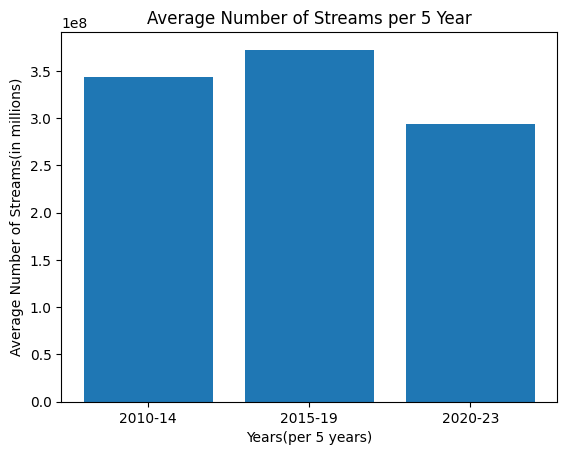

In [10]:
total_means = [mean_2010_2014, mean_2015_2019, mean_2020_2023]
categories = ['2010-14', '2015-19', '2020-23']
plt.bar(categories, total_means)
plt.xlabel('Years(per 5 years)')
plt.ylabel('Average Number of Streams(in millions)')
plt.title('Average Number of Streams per 5 Year')
plt.show()